In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
!{sys.executable} -m pip install keras

     |████████████████████████████████| 378kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 25.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.8MB/s eta 0:00:01


In [5]:
import sys
!{sys.executable} -m pip install tensorflow

     |████████████████████████████████| 102.7MB 27.2MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 604kB/s eta 0:00:01
     |████████████████████████████████| 112kB 22.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 32.1MB/s eta 0:00:01
     |████████████████████████████████| 450kB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 16.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 18.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 28.8MB/s eta 0:00:01
     |████████████████████████████████| 133kB 36.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.5MB/s eta 0:00:01
     |████████████████████████████████| 153kB 32.0MB/s eta 0:00:01
  Stored in directory: /Users/maverick/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored

  Stored in directory: /Users/maverick/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /Users/maverick/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
Successfully built gast absl-py termcolor opt-einsum


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
missing_values = ["n/a", "na", "--","-"]

In [4]:
newsdat=pd.read_csv("OnlineNewsPopularity.csv",na_values = missing_values)

In [5]:
newsdat.shape

(39644, 61)

In [6]:
newsdat.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
lifestyledf=newsdat[newsdat[' data_channel_is_lifestyle']==1]

In [8]:
lifestyledf['dat_ch']='lifestyle'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
lifestyledf.shape

(2099, 62)

In [10]:
entertainmentdf=newsdat[newsdat[' data_channel_is_entertainment']==1]

In [11]:
entertainmentdf['dat_ch']='entertainment'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
entertainmentdf.shape

(7057, 62)

In [13]:
busdf=newsdat[newsdat[' data_channel_is_bus']==1]

In [14]:
busdf['dat_ch']='bus'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
busdf.shape

(6258, 62)

In [16]:
socmeddf=newsdat[newsdat[' data_channel_is_socmed']==1]

In [17]:
socmeddf['dat_ch']='socmed'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
socmeddf.shape

(2323, 62)

In [19]:
techdf=newsdat[newsdat[' data_channel_is_tech']==1]

In [20]:
techdf['dat_ch']='tech'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
techdf.shape

(7346, 62)

In [22]:
worlddf=newsdat[newsdat[' data_channel_is_world']==1]

In [23]:
worlddf['dat_ch']='socmed'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
worlddf.shape

(8427, 62)

In [25]:
nonclasdf=newsdat[(newsdat[' data_channel_is_world']==0) & (newsdat[' data_channel_is_tech']==0) & (newsdat[' data_channel_is_socmed']==0) & (newsdat[' data_channel_is_bus']==0) & (newsdat[' data_channel_is_lifestyle']==0) & (newsdat[' data_channel_is_entertainment']==0)]

In [26]:
nonclasdf['dat_ch']='other'

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
nonclasdf.shape

(6134, 62)

In [28]:
frames=[nonclasdf,worlddf,techdf,socmeddf,busdf,lifestyledf,entertainmentdf]

In [29]:
newsdatcr=pd.concat(frames,ignore_index=True)

In [30]:
newsdatcr=newsdatcr.drop(['url',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world'],axis=1)

In [31]:
newsdatcr.shape

(39644, 55)

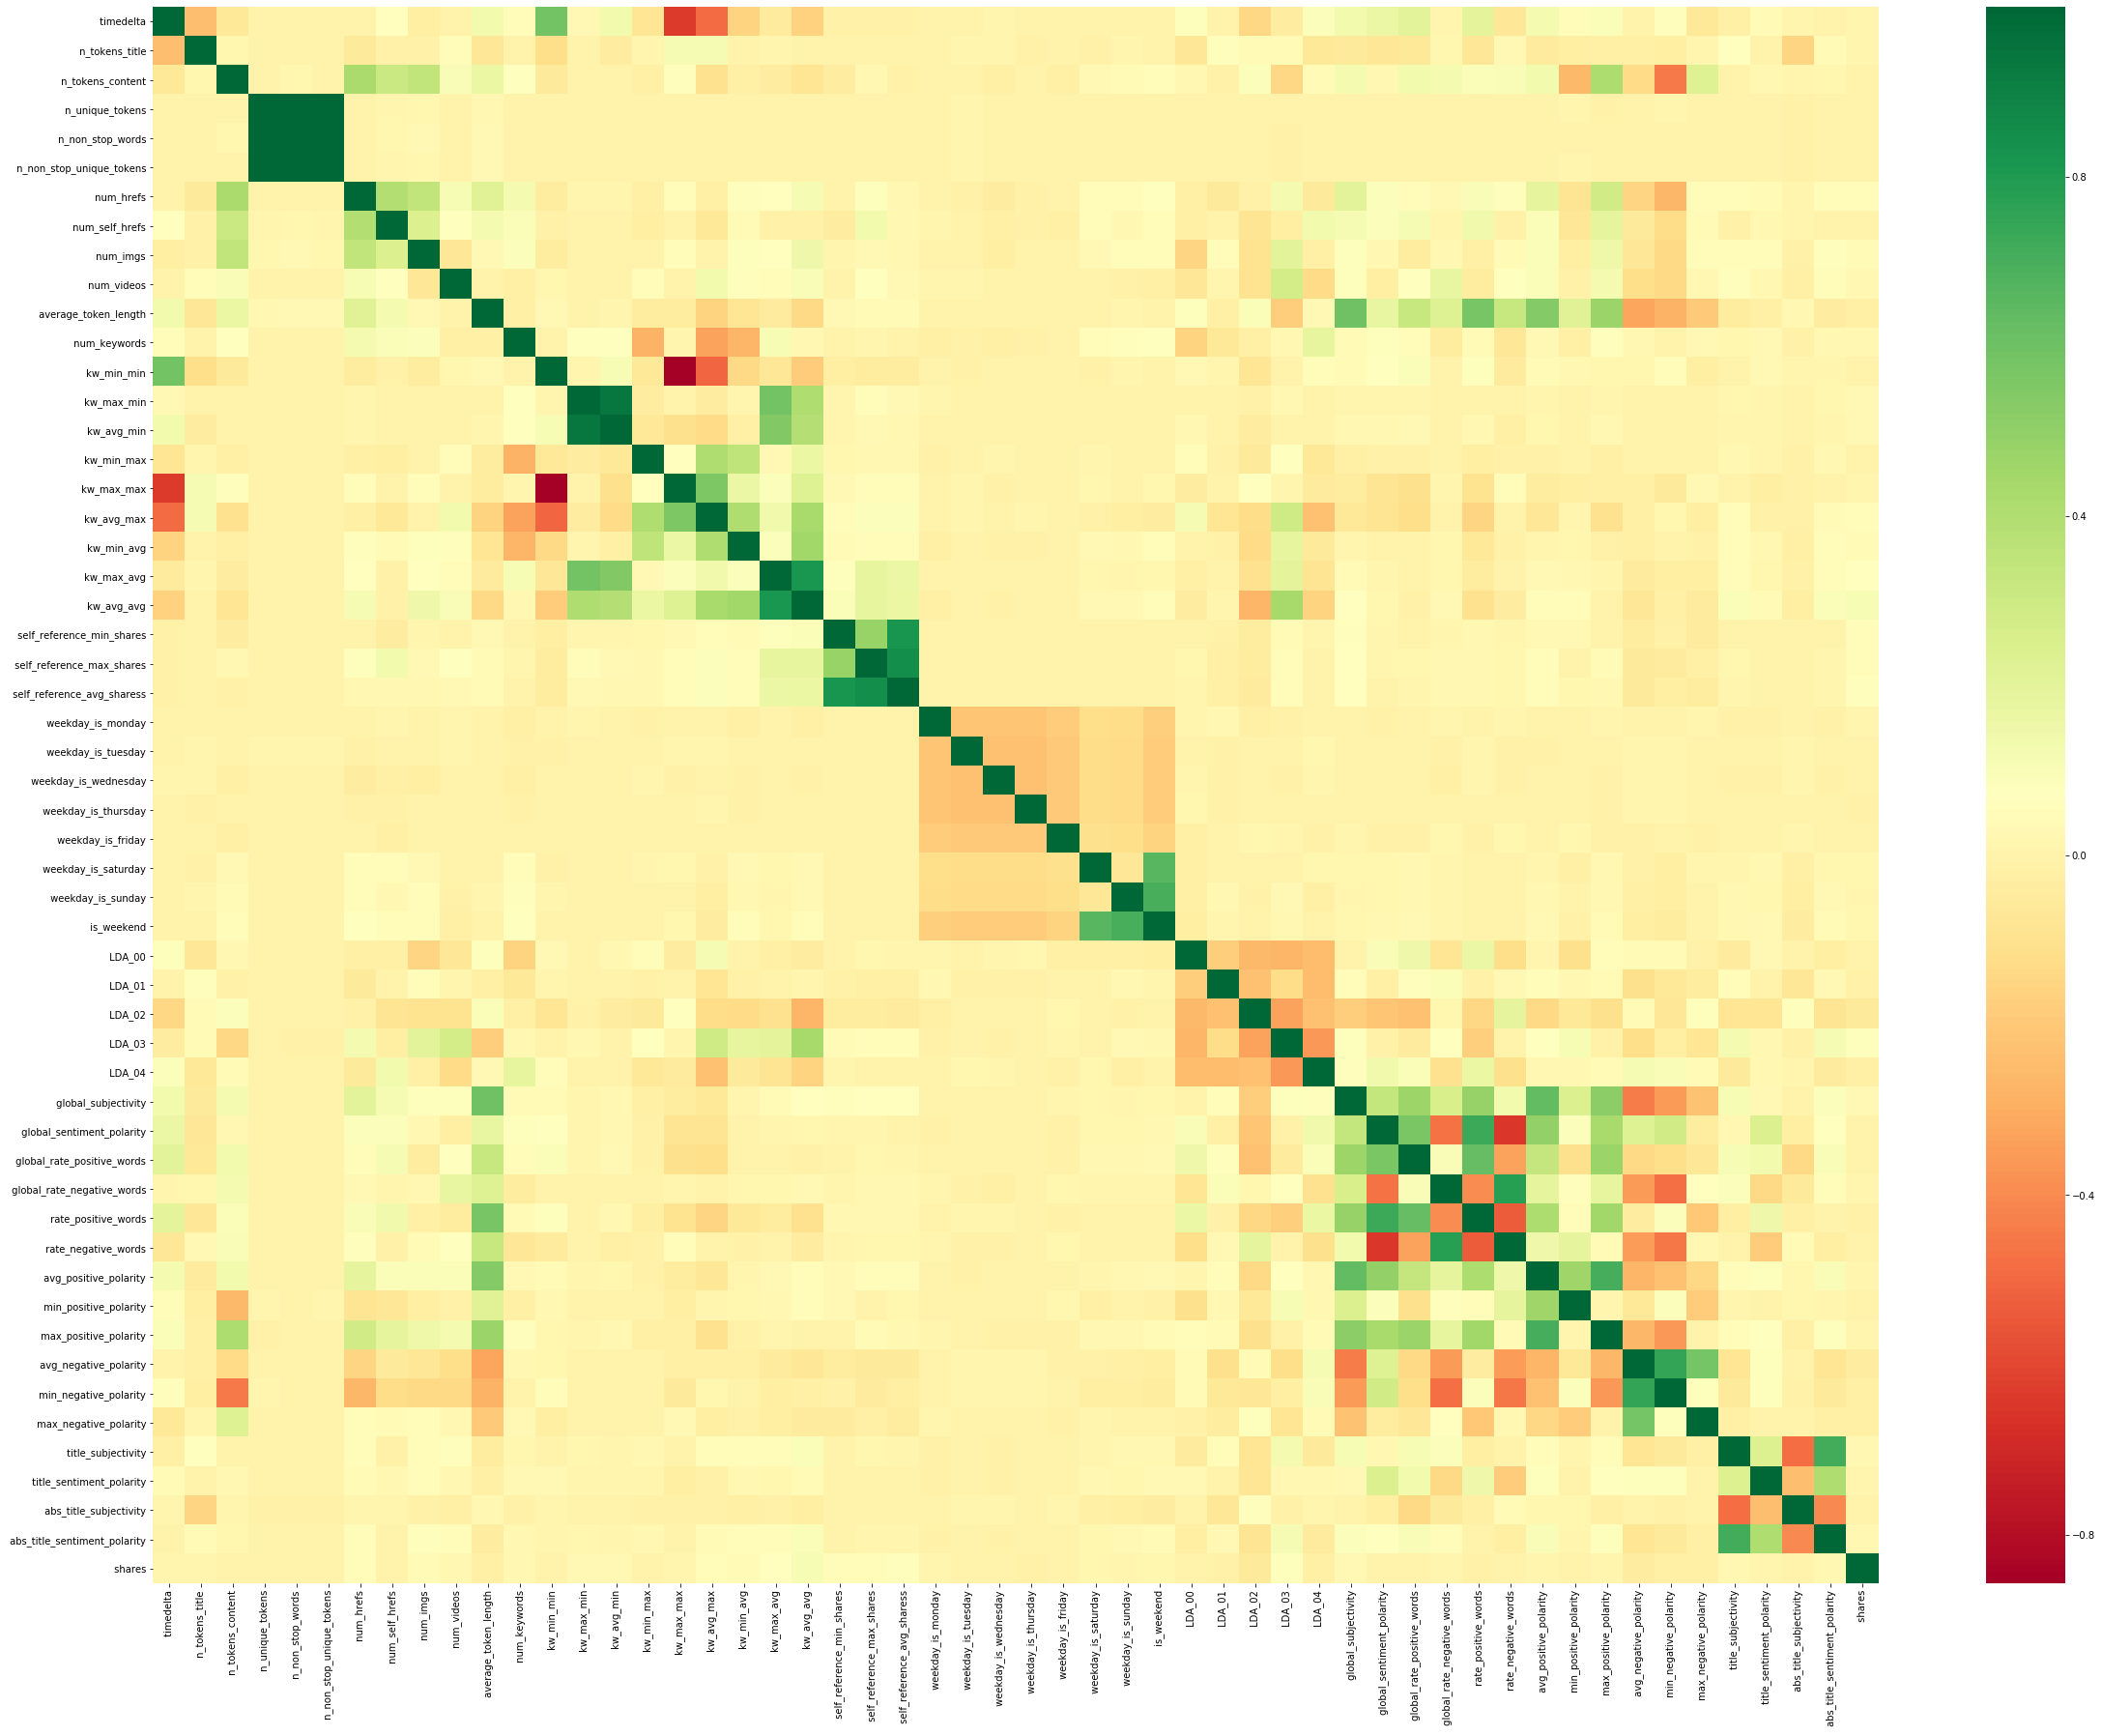

In [32]:
plt.figure(figsize=(40,30))
cor = newsdatcr.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.show()

In [33]:
newsdatcr=newsdatcr.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess'],axis=1)

In [105]:
newsdatcr.to_csv(r'Updatednewspopularity.csv')

In [81]:
X1= newsdatcr.iloc[:,0:49]
y1= newsdatcr.iloc[:,49]

In [82]:
X1.head(2)

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,9.0,274.0,0.707602,18.0,2.0,11.0,0.0,4.233577,8.0,...,0.20,0.7,-0.310417,-0.6,-0.05,1.0,-1.0,0.5,1.0,823
1,731.0,9.0,285.0,0.841530,4.0,2.0,0.0,21.0,4.343860,6.0,...,0.16,1.0,-0.337889,-0.7,-0.10,1.0,-1.0,0.5,1.0,10000


In [83]:
y1.head(2)

0    other
1    other
Name: dat_ch, dtype: object

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X1

array([[ 1.75788035, -0.66165665, -0.5784628 , ...,  0.83774863,
         3.72942386, -0.22124568],
       [ 1.75788035, -0.66165665, -0.55511327, ...,  0.83774863,
         3.72942386,  0.56805118],
       [ 1.75788035, -1.13469127, -0.61030307, ..., -0.4864851 ,
         1.74083697, -0.22657819],
       ...,
       [-1.61341404,  1.23048186, -0.71643729, ...,  0.83774863,
         1.51988287, -0.08561082],
       [-1.61808342,  1.23048186,  2.29777472, ..., -0.30992061,
         1.96179107, -0.17161897],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

In [85]:
Y1=y1.values

In [86]:
Y1

array(['other', 'other', 'other', ..., 'entertainment', 'entertainment',
       'entertainment'], dtype=object)

In [87]:
encoder = LabelEncoder()

In [88]:
encoder.fit(Y1)

LabelEncoder()

In [89]:
encoded_Y1 = encoder.transform(Y1)

In [90]:
transf_y1 = np_utils.to_categorical(encoded_Y1)

In [91]:
transf_y1

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, transf_y1, test_size=0.3)

In [101]:
model = Sequential()
model.add(Dense(800, input_dim=49, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.fit(X_train,y_train,epochs=21, batch_size=32, verbose=1)

Epoch 1/21
27750/27750 [==============================] - 8s 277us/step - loss: 0.7492 - accuracy: 0.7416
Epoch 2/21
27750/27750 [==============================] - 8s 274us/step - loss: 0.6144 - accuracy: 0.7874
Epoch 3/21
27750/27750 [==============================] - 8s 292us/step - loss: 0.5770 - accuracy: 0.8001
Epoch 4/21
27750/27750 [==============================] - 7s 263us/step - loss: 0.5460 - accuracy: 0.8070
Epoch 5/21
27750/27750 [==============================] - 7s 261us/step - loss: 0.5151 - accuracy: 0.8150
Epoch 6/21
27750/27750 [==============================] - 7s 256us/step - loss: 0.4910 - accuracy: 0.8237
Epoch 7/21
27750/27750 [==============================] - 7s 263us/step - loss: 0.4674 - accuracy: 0.8293
Epoch 8/21
27750/27750 [==============================] - 8s 271us/step - loss: 0.4519 - accuracy: 0.8365
Epoch 9/21
27750/27750 [==============================] - 8s 274us/step - loss: 0.4321 - accuracy: 0.8427
Epoch 10/21
27750/27750 [=====================

In [96]:
eval_model=model.evaluate(X_train, y_train)
eval_model

27750/27750 [==============================] - 2s 57us/step


[0.04499061664493822, 0.989441454410553]

In [97]:
y_pred=model.predict(X_test)

In [98]:
y_pred

array([[1.5472661e-14, 4.3219089e-08, 2.3779592e-09, 4.3287822e-15,
        1.4924761e-11, 1.0000000e+00],
       [4.6101001e-01, 1.3968101e-02, 1.9892681e-02, 2.3321309e-03,
        4.5458353e-01, 4.8213631e-02],
       [1.8930195e-03, 7.3256316e-03, 2.5750903e-02, 1.5051014e-04,
        9.2822880e-01, 3.6651079e-02],
       ...,
       [8.9778462e-03, 3.8065144e-05, 9.8879191e-08, 9.2060804e-01,
        7.0375957e-02, 8.8057464e-11],
       [4.5365528e-03, 9.5170385e-01, 2.5417810e-04, 7.9845004e-03,
        3.3980887e-02, 1.5399512e-03],
       [9.5243777e-06, 3.3117959e-04, 9.9755967e-01, 2.6886683e-04,
        4.2576726e-06, 1.8264487e-03]], dtype=float32)

In [99]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [100]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 78.7035480073987


In [108]:
import sys
!{sys.executable} -m pip install ann_visualizer

  Stored in directory: /Users/maverick/Library/Caches/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [114]:
import sys
!{sys.executable} -m pip install pydot

In [110]:
import graphviz

In [116]:
import pydot

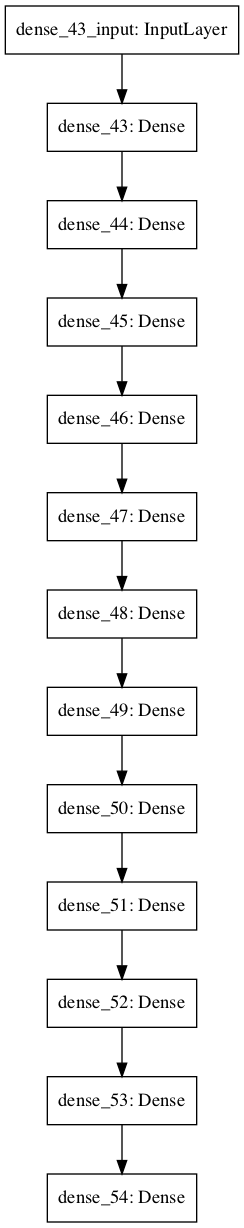

In [122]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
